### Initialisation de la session Spark

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Partie2').getOrCreate()

#### Informations sur l'objet spark créé précédemment

In [2]:
spark

### Analyse de l'action d'Apple
Contient toutes les statistiques quotidiennes liées aux actions d'Apple (AAPL) depuis 2010, y compris le cours de clôture, le cours d'ouverture, le cours maximum et le volume.

In [3]:
df = spark.read.csv('appl_stock.csv', inferSchema=True, header=True)

Consultation du schéma déterminé par Spark automatiquement

In [43]:
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



Affichage des 4 premières lignes

In [44]:
df.show(4)

+----------+----------+----------+------------------+----------+---------+------------------+
|      Date|      Open|      High|               Low|     Close|   Volume|         Adj Close|
+----------+----------+----------+------------------+----------+---------+------------------+
|2010-01-04|213.429998|214.499996|212.38000099999996|214.009998|123432400|         27.727039|
|2010-01-05|214.599998|215.589994|        213.249994|214.379993|150476200|27.774976000000002|
|2010-01-06|214.379993|    215.23|        210.750004|210.969995|138040000|27.333178000000004|
|2010-01-07|    211.75|212.000006|        209.050005|    210.58|119282800|          27.28265|
+----------+----------+----------+------------------+----------+---------+------------------+
only showing top 4 rows



Affichage des statistiques des différentes colonnes du dataframe

In [45]:
df.describe().show()

+-------+------------------+------------------+------------------+-----------------+-------------------+------------------+
|summary|              Open|              High|               Low|            Close|             Volume|         Adj Close|
+-------+------------------+------------------+------------------+-----------------+-------------------+------------------+
|  count|              1762|              1762|              1762|             1762|               1762|              1762|
|   mean| 313.0763111589103| 315.9112880164581| 309.8282405079457|312.9270656379113|9.422577587968218E7| 75.00174115607275|
| stddev|185.29946803981522|186.89817686485767|183.38391664371008|185.1471036170943|6.020518776592709E7| 28.57492972179906|
|    min|              90.0|         90.699997|         89.470001|        90.279999|           11475900|         24.881912|
|    max|        702.409988|        705.070023|        699.569977|       702.100021|          470249500|127.96609099999999|
+-------

Affichage des 4 premières lignes pour lesquelles l'action à l'ouverture est strictement inférieur à 100

In [46]:
df.filter('Open < 100').show(4)

+----------+---------+---------+---------+---------+--------+---------+
|      Date|     Open|     High|      Low|    Close|  Volume|Adj Close|
+----------+---------+---------+---------+---------+--------+---------+
|2014-06-09|92.699997|93.879997|    91.75|93.699997|75415000|88.906324|
|2014-06-10|94.730003|95.050003|    93.57|    94.25|62777000|89.428189|
|2014-06-11|94.129997|94.760002|93.470001|93.860001|45681000|89.058142|
|2014-06-12|94.040001|94.120003|91.900002|92.290001|54749000|87.568463|
+----------+---------+---------+---------+---------+--------+---------+
only showing top 4 rows



Nombre de lignes pour lesquelles l'action à l'ouverture est strictement inférieur à 100

In [47]:
df.filter('Open < 100').count()

165

Pourcentage représenté

In [48]:
df.filter('Open < 100').count() / df.count() * 100

9.364358683314416

Lignes pour lesquelles le cout de l'action à la fermeture est supérieur à 300 et le retournement des 2 colonnes Date et Close

In [49]:
df.filter("Close > 300").select("Date","Close").show()

+----------+------------------+
|      Date|             Close|
+----------+------------------+
|2010-10-13|300.14000699999997|
|2010-10-14|302.30998999999997|
|2010-10-15|314.73999399999997|
|2010-10-18|        317.999989|
|2010-10-19|309.48999399999997|
|2010-10-20|        310.529991|
|2010-10-21|        309.520008|
|2010-10-22|307.47000099999997|
|2010-10-25|        308.839993|
|2010-10-26|        308.049988|
|2010-10-27|307.83000899999996|
|2010-10-28|         305.23999|
|2010-10-29|            300.98|
|2010-11-01|        304.179993|
|2010-11-02|        309.360004|
|2010-11-03|        312.800003|
|2010-11-04|        318.270008|
|2010-11-05|        317.130009|
|2010-11-08|        318.620003|
|2010-11-09|        316.079998|
+----------+------------------+
only showing top 20 rows



Lignes pour lesquelles Close < 200 et Open > 200

In [50]:
df.filter( (df['Close'] < 200) & (df['Open'] > 200) ).show()

+----------+------------------+----------+----------+----------+---------+------------------+
|      Date|              Open|      High|       Low|     Close|   Volume|         Adj Close|
+----------+------------------+----------+----------+----------+---------+------------------+
|2010-01-22|206.78000600000001|207.499996|    197.16|    197.75|220441900|         25.620401|
|2010-01-28|        204.930004|205.500004|198.699995|199.289995|293375600|25.819922000000002|
|2010-01-29|        201.079996|202.199995|190.250002|192.060003|311488100|         24.883208|
+----------+------------------+----------+----------+----------+---------+------------------+



#### Analyse des données de ventes de plusieurs entreprises

In [51]:
# Lecture des données et stockage au sein d'un dataframe
sales_df = spark.read.csv('sales_info.csv', inferSchema=True, header=True)

In [52]:
sales_df.printSchema()

root
 |-- Company: string (nullable = true)
 |-- Person: string (nullable = true)
 |-- Sales: double (nullable = true)



In [53]:
sales_df.describe().show()

+-------+-------+-------+------------------+
|summary|Company| Person|             Sales|
+-------+-------+-------+------------------+
|  count|     12|     12|                12|
|   mean|   null|   null| 360.5833333333333|
| stddev|   null|   null|250.08742410799007|
|    min|   APPL|  Chris|             120.0|
|    max|   MSFT|Vanessa|             870.0|
+-------+-------+-------+------------------+



In [54]:
sales_df.groupBy("Company").agg({"Sales":"sum"}).show()

+-------+----------+
|Company|sum(Sales)|
+-------+----------+
|   APPL|    1480.0|
|   GOOG|     660.0|
|     FB|    1220.0|
|   MSFT|     967.0|
+-------+----------+



## Visualisation des données

In [55]:
# Import dependencies

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [56]:
sales_df.show(2)

+-------+-------+-----+
|Company| Person|Sales|
+-------+-------+-----+
|   GOOG|    Sam|200.0|
|   GOOG|Charlie|120.0|
+-------+-------+-----+
only showing top 2 rows



In [57]:
df.show(2)

+----------+----------+----------+------------------+----------+---------+------------------+
|      Date|      Open|      High|               Low|     Close|   Volume|         Adj Close|
+----------+----------+----------+------------------+----------+---------+------------------+
|2010-01-04|213.429998|214.499996|212.38000099999996|214.009998|123432400|         27.727039|
|2010-01-05|214.599998|215.589994|        213.249994|214.379993|150476200|27.774976000000002|
+----------+----------+----------+------------------+----------+---------+------------------+
only showing top 2 rows



### Passage à un dataframe pandas pour la visualisation

In [58]:
df_pd = df.toPandas()

### Nuage de points
Etude de la correlation entre deux variables

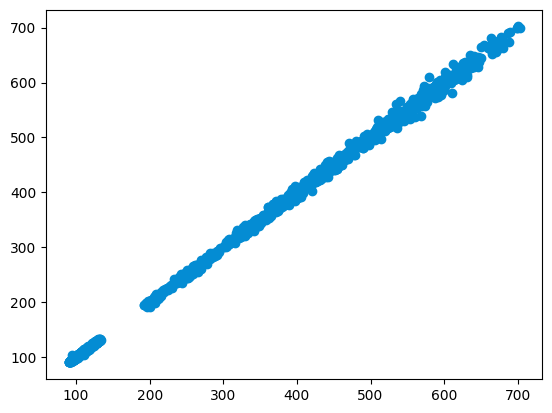

In [59]:
plt.plot(df_pd['Open'], df_pd['Close'], linestyle='none', marker='o', color='#048cd3')
plt.show()

### Courbe
Analyser l'évolution sur le temps d'une valeur numérique

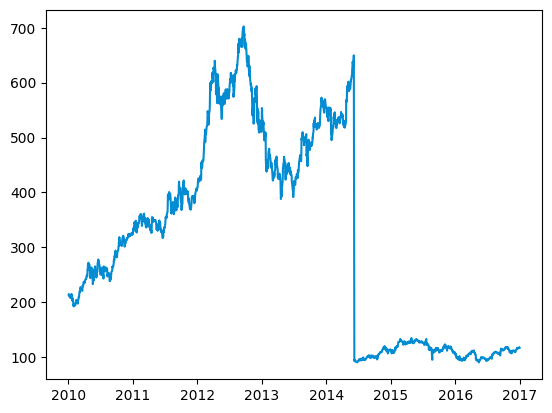

In [60]:
x = df_pd['Date']
y = df_pd['Open']

plt.plot(x,y, color='#048cd3', linestyle='-')
plt.show()

### Histogramme
Analyser la distribution d'une variable numérique

Text(0.5, 1.0, 'Adj Close distribution.')

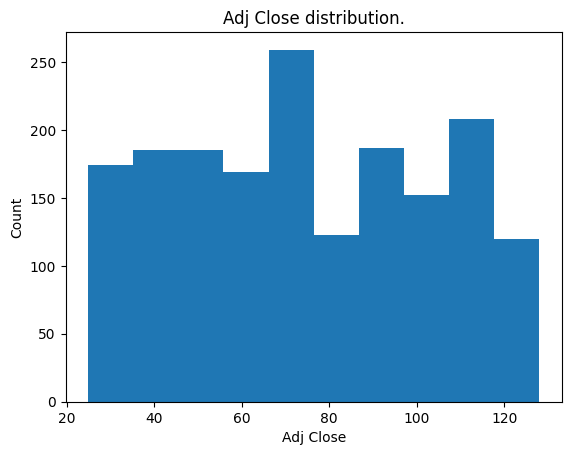

In [64]:
plt.hist(df_pd['Adj Close'])
plt.xlabel('Adj Close')
plt.ylabel('Count')
plt.title('Adj Close distribution.')

### Graphique à barres
Comparer des catégories suivant une valeur numérique

In [65]:
sales_df_pd = sales_df.toPandas()

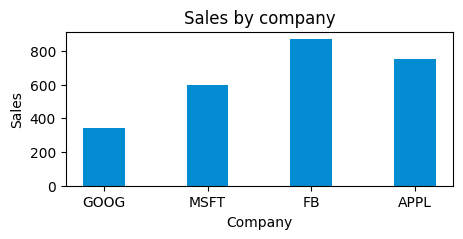

In [66]:
fig = plt.figure(figsize = (5, 2))
 
# creating the bar plot
plt.bar(sales_df_pd['Company'], sales_df_pd['Sales'], color ='#048cd3', 
        width = 0.4)
 
plt.xlabel("Company")
plt.ylabel("Sales")
plt.title("Sales by company")
plt.show()

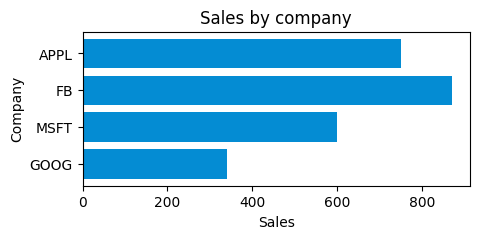

In [67]:
fig = plt.figure(figsize = (5, 2))
 
# creating the bar plot
plt.barh(sales_df_pd['Company'],sales_df_pd['Sales'],  color ='#048cd3')
 
plt.xlabel("Sales")
plt.ylabel("Company")
plt.title("Sales by company")
plt.show()